In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
# setting font sizeto 30
plt.rcParams.update({'font.size': 15})

In [2]:
Temperature_Day1_Expt2 = pd.read_excel(r'C:\Users\Subhadeep\Documents\Datasets\Experiment 2\Temperature_calibration.xlsx',sheet_name='DAY_1')
Temperature_Day2_Expt2 = pd.read_excel(r'C:\Users\Subhadeep\Documents\Datasets\Experiment 2\Temperature_calibration.xlsx',sheet_name='DAY_2')
Temperature_Day3_Expt2 = pd.read_excel(r'C:\Users\Subhadeep\Documents\Datasets\Experiment 2\Temperature_calibration.xlsx',sheet_name='DAY_3')
Temperature_Day4_Expt2 = pd.read_excel(r'C:\Users\Subhadeep\Documents\Datasets\Experiment 2\Temperature_calibration.xlsx',sheet_name='DAY_4')
Temperature_Day5_Expt2 = pd.read_excel(r'C:\Users\Subhadeep\Documents\Datasets\Experiment 2\Temperature_calibration.xlsx',sheet_name='DAY_5')
Temperature_Day6_Expt2 = pd.read_excel(r'C:\Users\Subhadeep\Documents\Datasets\Experiment 2\Temperature_calibration.xlsx',sheet_name='DAY_6')
Temperature_Day7_Expt2 = pd.read_excel(r'C:\Users\Subhadeep\Documents\Datasets\Experiment 2\Temperature_calibration.xlsx',sheet_name='DAY_7')
Temperature_Day8_Expt2 = pd.read_excel(r'C:\Users\Subhadeep\Documents\Datasets\Experiment 2\Temperature_calibration.xlsx',sheet_name='DAY_8')
Temperature_Day9_Expt2 = pd.read_excel(r'C:\Users\Subhadeep\Documents\Datasets\Experiment 2\Temperature_calibration.xlsx',sheet_name='DAY_9')
Temperature_Day10_Expt2 = pd.read_excel(r'C:\Users\Subhadeep\Documents\Datasets\Experiment 2\Temperature_calibration.xlsx',sheet_name='DAY_10')
Temperature_Day11_Expt2 = pd.read_excel(r'C:\Users\Subhadeep\Documents\Datasets\Experiment 2\Temperature_calibration.xlsx',sheet_name='DAY_11')
Temperature_Day12_Expt2 = pd.read_excel(r'C:\Users\Subhadeep\Documents\Datasets\Experiment 2\Temperature_calibration.xlsx',sheet_name='DAY_12')
Temperature_Day13_Expt2 = pd.read_excel(r'C:\Users\Subhadeep\Documents\Datasets\Experiment 2\Temperature_calibration.xlsx',sheet_name='DAY_13')
Temperature_Day14_Expt2 = pd.read_excel(r'C:\Users\Subhadeep\Documents\Datasets\Experiment 2\Temperature_calibration.xlsx',sheet_name='DAY_14')
Temperature_Day15_Expt2 = pd.read_excel(r'C:\Users\Subhadeep\Documents\Datasets\Experiment 2\Temperature_calibration.xlsx',sheet_name='DAY_15')

In [3]:
Temperature_Day1_Expt2 = Temperature_Day1_Expt2.dropna()
Temperature_Day2_Expt2 = Temperature_Day2_Expt2.dropna()
Temperature_Day3_Expt2 = Temperature_Day3_Expt2.dropna()
Temperature_Day4_Expt2 = Temperature_Day4_Expt2.dropna()
Temperature_Day5_Expt2 = Temperature_Day5_Expt2.dropna()
Temperature_Day6_Expt2 = Temperature_Day6_Expt2.dropna()
Temperature_Day7_Expt2 = Temperature_Day7_Expt2.dropna()
Temperature_Day8_Expt2 = Temperature_Day8_Expt2.dropna()
Temperature_Day9_Expt2 = Temperature_Day9_Expt2.dropna()
Temperature_Day10_Expt2 = Temperature_Day10_Expt2.dropna()
Temperature_Day11_Expt2 = Temperature_Day11_Expt2.dropna()
Temperature_Day12_Expt2 = Temperature_Day12_Expt2.dropna()
Temperature_Day13_Expt2 = Temperature_Day13_Expt2.dropna()
Temperature_Day14_Expt2 = Temperature_Day14_Expt2.dropna()
Temperature_Day15_Expt2 = Temperature_Day15_Expt2.dropna()

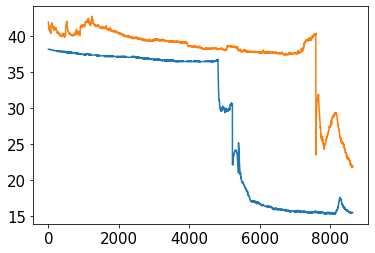

In [7]:
S1_Day1 = Temperature_Day1_Expt2['T_Container']
S2_Day1 = Temperature_Day1_Expt2['NT_Container']
NUM_POINTS = 8639
NUM_TIME = 24
time = np.linspace(0,NUM_TIME, NUM_POINTS)
realpos = S2_Day1

plt.plot(S1_Day1)
plt.plot(S2_Day1)

In [8]:
def takeMeasurement(S1_Day1):
    '''
    function:
    ---------
    generate a noisy measurement given the current state of the system. the 
    measurement is approximated as "true position" plus some gaussian noise.
    
    parameter:
    ----------
    @realpos: float, refers to actual position at a particular time.
    
    returns:
    --------
    @z: float, represents measurement at particular time. 
    '''
    measurementNoise = 0.2
    z = np.random.normal(S1_Day1, measurementNoise)
    return z

def takeOdometry(realpos_prev, realpos_curr):
    '''
    function:
    ---------
    generate a noisy odometry (otherwise known as control) given the 
    current state of the system.
    
    an odometer takes the previous position and adds a finite value (itself has noise). 
    over longer periods, it will start to drift since noise accumulates.
    
    parameters:
    -----------
    @realpos_prev: float, refers to previous real position.
    @realpos_curr: float, refers to current real position.
    
    returns:
    --------
    @u: float, refers to estimated change in position.
    '''
    processNoise = .01
    if realpos_prev == realpos_curr:
        u = 0
    else:
        u = np.random.normal(realpos_curr - realpos_prev, processNoise)
    return u

In [12]:
processNoise = 0.01;
measurementNoise = 0.2;

estimated_position = [] # list of best-guess estimates

x = realpos[0] # represents final estimate - takes into account odometer and measurements
p = processNoise

unfilterOdometryReading = realpos[0] # raw odometer readings
unfilterOdometry = [] # list of odometry estimates 
unfilterMeasurements = [] # list of measurements
measurement_time = []

for i in range(len(time)):
    
    # step 1: take odometer reading and update estimate
    if i == 0:
        u = takeOdometry(realpos[i], realpos[i])
    else:
        u = takeOdometry(realpos[i - 1], realpos[i])
    x += u
    
    # track raw odometer readings for comparison
    unfilterOdometryReading += u
    unfilterOdometry.append(unfilterOdometryReading)
    
    p += processNoise
    
    # every 10 steps, take measurement
    if i % 10 == 0:
        z = takeMeasurement(realpos[i])
        
        # track measurements for comparison
        measurement_time.append(time[i]) 
        unfilterMeasurements.append(z)
        
        # update odometer estimate with measurements - this reduces drift
        y = z - x
        k = p / (p + measurementNoise)
        x = x + k * y
        p = (1 - k)*p
    
    # track best guess estimates
    estimated_position.append(x)

Text(0.5, 1.0, 'comparison of sensor readings')

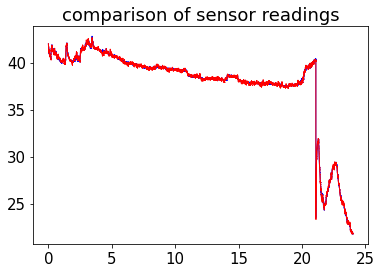

In [14]:
plt.plot(time, S2_Day1, color='blue', marker='x', linewidth=1, markersize=0.1, label='Ground Truth')
#plt.plot(time, S1, color='green', marker='x', linewidth=2, markersize=0.1, label='Noisy Measurements')
plt.plot(time, estimated_position, color='red', marker='x', linewidth=1, markersize=0.1, label='Estimates')
plt.title('comparison of sensor readings')

In [17]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
savetxt('kalman_temp_day1.csv', estimated_position, delimiter=',')

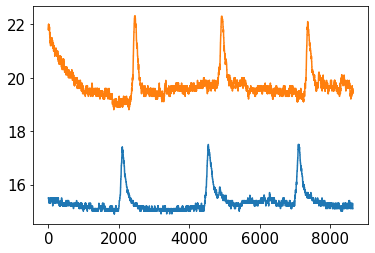

In [25]:
S1_Day2 = Temperature_Day2_Expt2['T_Container']
S2_Day2 = Temperature_Day2_Expt2['NT_Container']
NUM_POINTS = 8640
NUM_TIME = 24
time = np.linspace(0,NUM_TIME, NUM_POINTS)
realpos = S2_Day2

plt.plot(S1_Day2)
plt.plot(S2_Day2)

In [26]:
def takeMeasurement(S1_Day2):
    '''
    function:
    ---------
    generate a noisy measurement given the current state of the system. the 
    measurement is approximated as "true position" plus some gaussian noise.
    
    parameter:
    ----------
    @realpos: float, refers to actual position at a particular time.
    
    returns:
    --------
    @z: float, represents measurement at particular time. 
    '''
    measurementNoise = 0.2
    z = np.random.normal(S1_Day2, measurementNoise)
    return z

def takeOdometry(realpos_prev, realpos_curr):
    '''
    function:
    ---------
    generate a noisy odometry (otherwise known as control) given the 
    current state of the system.
    
    an odometer takes the previous position and adds a finite value (itself has noise). 
    over longer periods, it will start to drift since noise accumulates.
    
    parameters:
    -----------
    @realpos_prev: float, refers to previous real position.
    @realpos_curr: float, refers to current real position.
    
    returns:
    --------
    @u: float, refers to estimated change in position.
    '''
    processNoise = .01
    if realpos_prev == realpos_curr:
        u = 0
    else:
        u = np.random.normal(realpos_curr - realpos_prev, processNoise)
    return u

In [27]:
processNoise = 0.01;
measurementNoise = 0.2;

estimated_position = [] # list of best-guess estimates

x = realpos[0] # represents final estimate - takes into account odometer and measurements
p = processNoise

unfilterOdometryReading = realpos[0] # raw odometer readings
unfilterOdometry = [] # list of odometry estimates 
unfilterMeasurements = [] # list of measurements
measurement_time = []

for i in range(len(time)):
    
    # step 1: take odometer reading and update estimate
    if i == 0:
        u = takeOdometry(realpos[i], realpos[i])
    else:
        u = takeOdometry(realpos[i - 1], realpos[i])
    x += u
    
    # track raw odometer readings for comparison
    unfilterOdometryReading += u
    unfilterOdometry.append(unfilterOdometryReading)
    
    p += processNoise
    
    # every 10 steps, take measurement
    if i % 10 == 0:
        z = takeMeasurement(realpos[i])
        
        # track measurements for comparison
        measurement_time.append(time[i]) 
        unfilterMeasurements.append(z)
        
        # update odometer estimate with measurements - this reduces drift
        y = z - x
        k = p / (p + measurementNoise)
        x = x + k * y
        p = (1 - k)*p
    
    # track best guess estimates
    estimated_position.append(x)

Text(0.5, 1.0, 'comparison of sensor readings')

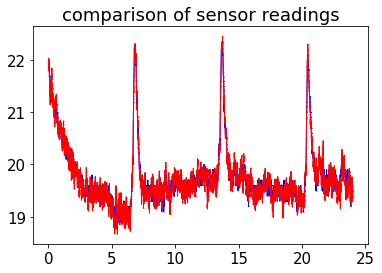

In [28]:
plt.plot(time, S2_Day2, color='blue', marker='x', linewidth=1, markersize=0.1, label='Ground Truth')
#plt.plot(time, S1, color='green', marker='x', linewidth=2, markersize=0.1, label='Noisy Measurements')
plt.plot(time, estimated_position, color='red', marker='x', linewidth=1, markersize=0.1, label='Estimates')
plt.title('comparison of sensor readings')

In [29]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
savetxt('kalman_temp_day2.csv', estimated_position, delimiter=',')

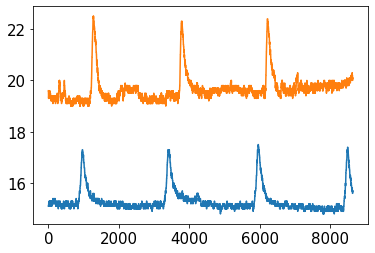

In [31]:
#day 3
S1_Day3 = Temperature_Day3_Expt2['T_Container']
S2_Day3 = Temperature_Day3_Expt2['NT_Container']
NUM_POINTS = 8640
NUM_TIME = 24
time = np.linspace(0,NUM_TIME, NUM_POINTS)
realpos = S2_Day3

plt.plot(S1_Day3)
plt.plot(S2_Day3)

In [32]:
def takeMeasurement(S1_Day3):
    '''
    function:
    ---------
    generate a noisy measurement given the current state of the system. the 
    measurement is approximated as "true position" plus some gaussian noise.
    
    parameter:
    ----------
    @realpos: float, refers to actual position at a particular time.
    
    returns:
    --------
    @z: float, represents measurement at particular time. 
    '''
    measurementNoise = 0.2
    z = np.random.normal(S1_Day3, measurementNoise)
    return z

def takeOdometry(realpos_prev, realpos_curr):
    '''
    function:
    ---------
    generate a noisy odometry (otherwise known as control) given the 
    current state of the system.
    
    an odometer takes the previous position and adds a finite value (itself has noise). 
    over longer periods, it will start to drift since noise accumulates.
    
    parameters:
    -----------
    @realpos_prev: float, refers to previous real position.
    @realpos_curr: float, refers to current real position.
    
    returns:
    --------
    @u: float, refers to estimated change in position.
    '''
    processNoise = .01
    if realpos_prev == realpos_curr:
        u = 0
    else:
        u = np.random.normal(realpos_curr - realpos_prev, processNoise)
    return u

In [33]:
processNoise = 0.01;
measurementNoise = 0.2;

estimated_position = [] # list of best-guess estimates

x = realpos[0] # represents final estimate - takes into account odometer and measurements
p = processNoise

unfilterOdometryReading = realpos[0] # raw odometer readings
unfilterOdometry = [] # list of odometry estimates 
unfilterMeasurements = [] # list of measurements
measurement_time = []

for i in range(len(time)):
    
    # step 1: take odometer reading and update estimate
    if i == 0:
        u = takeOdometry(realpos[i], realpos[i])
    else:
        u = takeOdometry(realpos[i - 1], realpos[i])
    x += u
    
    # track raw odometer readings for comparison
    unfilterOdometryReading += u
    unfilterOdometry.append(unfilterOdometryReading)
    
    p += processNoise
    
    # every 10 steps, take measurement
    if i % 10 == 0:
        z = takeMeasurement(realpos[i])
        
        # track measurements for comparison
        measurement_time.append(time[i]) 
        unfilterMeasurements.append(z)
        
        # update odometer estimate with measurements - this reduces drift
        y = z - x
        k = p / (p + measurementNoise)
        x = x + k * y
        p = (1 - k)*p
    
    # track best guess estimates
    estimated_position.append(x)

Text(0.5, 1.0, 'comparison of sensor readings')

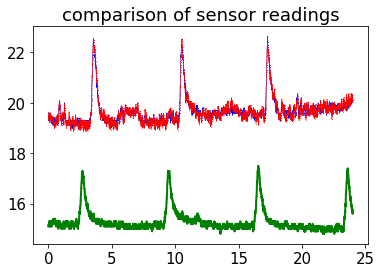

In [41]:
plt.plot(time, S2_Day3, color='blue', marker='x', linewidth=0.5, markersize=0.1, label='Ground Truth')
plt.plot(time, S1_Day3, color='green', marker='x', linewidth=2, markersize=0.1, label='Noisy Measurements')
plt.plot(time, estimated_position, color='red', marker='x', linewidth=0.5, markersize=0.1, label='Estimates')
plt.title('comparison of sensor readings')

In [40]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
savetxt('kalman_temp_day3.csv', estimated_position, delimiter=',')

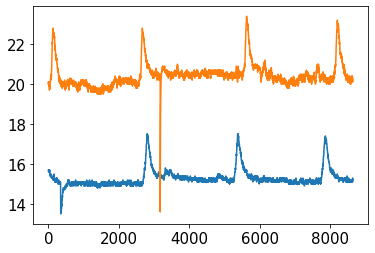

In [102]:
#day 4
S1_Day4 = Temperature_Day4_Expt2['T_Container']
S2_Day4 = Temperature_Day4_Expt2['NT_Container']
NUM_POINTS = 8640
NUM_TIME = 24
time = np.linspace(0,NUM_TIME, NUM_POINTS)
realpos = S1_Day4

plt.plot(S1_Day4)
plt.plot(S2_Day4)

In [103]:
def takeMeasurement(S2_Day4):
    '''
    function:
    ---------
    generate a noisy measurement given the current state of the system. the 
    measurement is approximated as "true position" plus some gaussian noise.
    
    parameter:
    ----------
    @realpos: float, refers to actual position at a particular time.
    
    returns:
    --------
    @z: float, represents measurement at particular time. 
    '''
    measurementNoise = 0.2
    z = np.random.normal(S2_Day4, measurementNoise)
    return z

def takeOdometry(realpos_prev, realpos_curr):
    '''
    function:
    ---------
    generate a noisy odometry (otherwise known as control) given the 
    current state of the system.
    
    an odometer takes the previous position and adds a finite value (itself has noise). 
    over longer periods, it will start to drift since noise accumulates.
    
    parameters:
    -----------
    @realpos_prev: float, refers to previous real position.
    @realpos_curr: float, refers to current real position.
    
    returns:
    --------
    @u: float, refers to estimated change in position.
    '''
    processNoise = .01
    if realpos_prev == realpos_curr:
        u = 0
    else:
        u = np.random.normal(realpos_curr - realpos_prev, processNoise)
    return u

In [104]:
processNoise = 0.01;
measurementNoise = 0.2;

estimated_position = [] # list of best-guess estimates
kf_convolution = [] #filter output using convolution
kf_l_filter_function = [] #filter output using lfilter function

x = realpos[0] # represents final estimate - takes into account odometer and measurements
p = processNoise

unfilterOdometryReading = realpos[0] # raw odometer readings
unfilterOdometry = [] # list of odometry estimates 
unfilterMeasurements = [] # list of measurements
measurement_time = []


for i in range(len(time)):
    
    # step 1: take odometer reading and update estimate
    if i == 0:
        u = takeOdometry(realpos[i], realpos[i])
    else:
        u = takeOdometry(realpos[i - 1], realpos[i])
    x += u
    
    # track raw odometer readings for comparison
    unfilterOdometryReading += u
    unfilterOdometry.append(unfilterOdometryReading)
    
    p += processNoise
    
    # every 10 steps, take measurement
    if i % 10 == 0:
        z = takeMeasurement(realpos[i])
        
        # track measurements for comparison
        measurement_time.append(time[i]) 
        unfilterMeasurements.append(z)
        
        # update odometer estimate with measurements - this reduces drift
        y = z - x
        k = p / (p + measurementNoise)
        x = x + k * y
        p = (1 - k)*p
       
    # track best guess estimates of kalman filter
    estimated_position.append(x)  

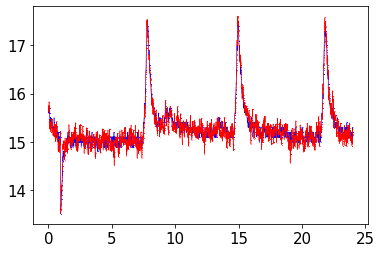

In [105]:
plt.plot(time, S1_Day4, color='blue', marker='x', linewidth=0.5, markersize=0.1, label='Ground Truth')
#plt.plot(time, S2_Day4, color='green', marker='x', linewidth=2, markersize=0.1, label='Noisy Measurements')
plt.plot(time, estimated_position, color='red', marker='x', linewidth=0.5, markersize=0.1, label='Estimates')

In [107]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
savetxt('kalman_temp_day4.csv', estimated_position, delimiter=',')

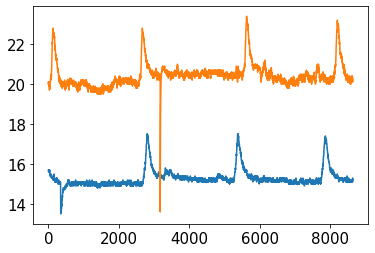

In [90]:
#This was to check the effect of digital filter on the kalman estimates
S1_Day4 = Temperature_Day4_Expt2['T_Container']
S2_Day4 = Temperature_Day4_Expt2['NT_Container']
NUM_POINTS = 8640
NUM_TIME = 24
time = np.linspace(0,NUM_TIME, NUM_POINTS)
realpos = S2_Day4

plt.plot(S1_Day4)
plt.plot(S2_Day4)

In [91]:
def takeMeasurement(S1_Day4):
    '''
    function:
    ---------
    generate a noisy measurement given the current state of the system. the 
    measurement is approximated as "true position" plus some gaussian noise.
    
    parameter:
    ----------
    @realpos: float, refers to actual position at a particular time.
    
    returns:
    --------
    @z: float, represents measurement at particular time. 
    '''
    measurementNoise = 0.2
    z = np.random.normal(S1_Day4, measurementNoise)
    return z

def takeOdometry(realpos_prev, realpos_curr):
    '''
    function:
    ---------
    generate a noisy odometry (otherwise known as control) given the 
    current state of the system.
    
    an odometer takes the previous position and adds a finite value (itself has noise). 
    over longer periods, it will start to drift since noise accumulates.
    
    parameters:
    -----------
    @realpos_prev: float, refers to previous real position.
    @realpos_curr: float, refers to current real position.
    
    returns:
    --------
    @u: float, refers to estimated change in position.
    '''
    processNoise = .01
    if realpos_prev == realpos_curr:
        u = 0
    else:
        u = np.random.normal(realpos_curr - realpos_prev, processNoise)
    return u

In [92]:
processNoise = 0.01;
measurementNoise = 0.2;

estimated_position = [] # list of best-guess estimates
kf_convolution = [] #filter output using convolution
kf_l_filter_function = [] #filter output using lfilter function

x = realpos[0] # represents final estimate - takes into account odometer and measurements
p = processNoise

unfilterOdometryReading = realpos[0] # raw odometer readings
unfilterOdometry = [] # list of odometry estimates 
unfilterMeasurements = [] # list of measurements
measurement_time = []


for i in range(len(time)):
    
    # step 1: take odometer reading and update estimate
    if i == 0:
        u = takeOdometry(realpos[i], realpos[i])
    else:
        u = takeOdometry(realpos[i - 1], realpos[i])
    x += u
    
    # track raw odometer readings for comparison
    unfilterOdometryReading += u
    unfilterOdometry.append(unfilterOdometryReading)
    
    p += processNoise
    
    # every 10 steps, take measurement
    if i % 10 == 0:
        z = takeMeasurement(realpos[i])
        
        # track measurements for comparison
        measurement_time.append(time[i]) 
        unfilterMeasurements.append(z)
        
        # update odometer estimate with measurements - this reduces drift
        y = z - x
        k = p / (p + measurementNoise)
        x = x + k * y
        p = (1 - k)*p
       
    # track best guess estimates of kalman filter
    estimated_position.append(x)  

    L=120 #L-point filter
    b = (np.ones(L))/L #numerator co-effs of filter transfer function
    a = np.ones(1)  #denominator co-effs of filter transfer function
    m = signal.convolve(estimated_position,b) #filter output using convolution
    n = signal.lfilter(b,a,estimated_position) #filter output using lfilter function
   
    # track best guess estimates of modified kalman filter
    #kf_convolution.append(m)
    #kf_l_filter_function.append(n)
    
    #for plot
    #x_plot = estimated_position[2000:6000]
    #m = m[2000:6000]
    #n = n[2000:6000]
    
    

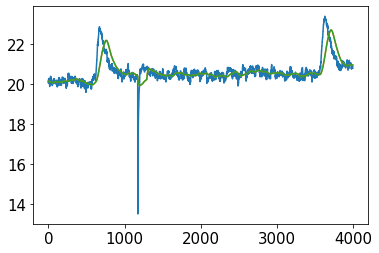

In [89]:
plt.plot(x_plot)
plt.plot(m)
plt.plot(n)

Text(0.5, 1.0, 'comparison of sensor readings')

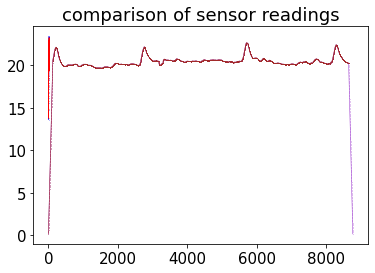

In [93]:
plt.plot(time, S2_Day4, color='blue', marker='x', linewidth=0.5, markersize=0.1, label='Ground Truth')
#plt.plot(time, S1_Day4, color='green', marker='x', linewidth=2, markersize=0.1, label='Noisy Measurements')
plt.plot(time, estimated_position, color='red', marker='x', linewidth=0.5, markersize=0.1, label='Estimates')
plt.plot(m, color='darkorchid', marker='x', linewidth=0.5, markersize=0.1, label='Estimates')
plt.plot(n, color='brown', marker='x', linewidth=0.5, markersize=0.1, label='Estimates')
plt.title('comparison of sensor readings')

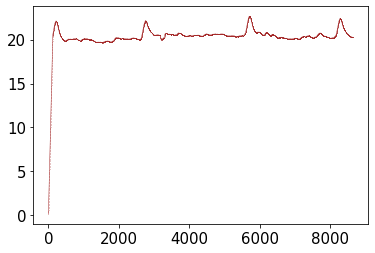

In [94]:
plt.plot(n, color='brown', marker='x', linewidth=0.5, markersize=0.1, label='Estimates')

In [98]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
savetxt('kalman_temp_day4.csv', n, delimiter=',')